In [1]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

d:\python\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Filter for Pakistan Data Analyst Roles

In [22]:
df_DA_PK = df[(df['job_country']=='Pakistan')&(df['job_title_short']=='Data Analyst')].copy()

In [29]:
df_DA_PK['job_location'] = df_DA_PK['job_location'].str.replace(', Pakistan','')

## Count of Jobs per Location for Data Analyst in the Pakistan

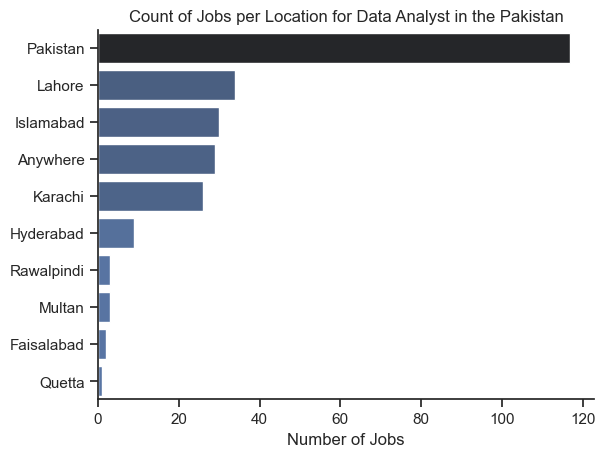

In [30]:
df_plot = df_DA_PK['job_location'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data= df_plot, x= 'count', y= 'job_location',hue='count', palette= 'dark:b_r', legend= False)
sns.despine()
plt.title('Count of Jobs per Location for Data Analyst in the Pakistan')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

## Requirment and Facilities Analysis

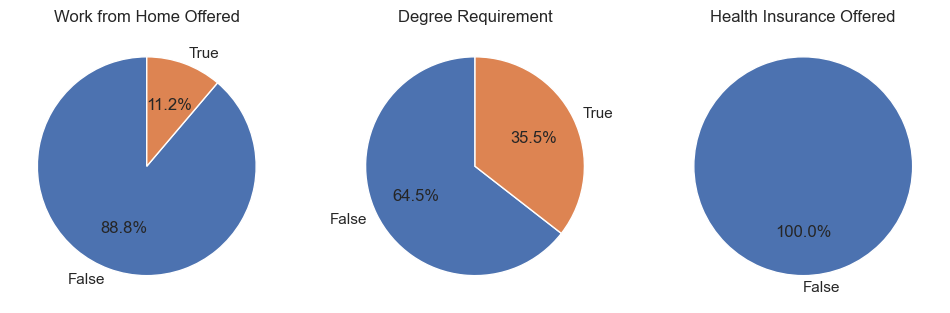

In [36]:
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3)
fig.set_size_inches((12, 5))

for i, (column, title) in enumerate(dict_column.items()):
    value_counts = df_DA_PK[column].value_counts()
    labels = value_counts.index.tolist()
    ax[i].pie(value_counts, labels=labels, autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)

plt.show()

## Top companies providing Data Analyst Jobs

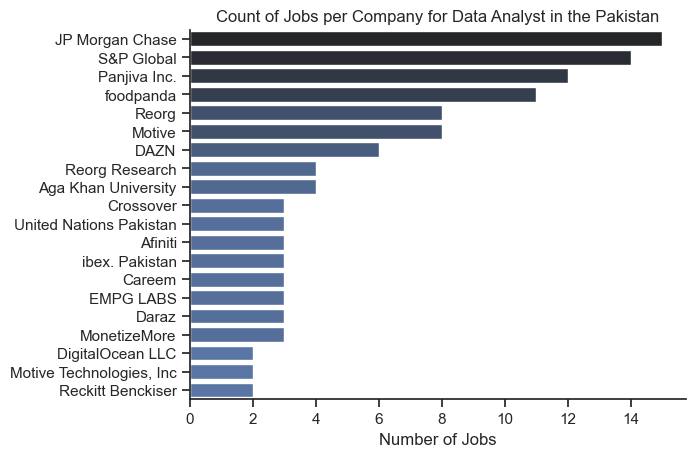

In [39]:
df_plot = df_DA_PK['company_name'].value_counts().head(20).to_frame()

sns.barplot(data= df_plot, x= 'count', y= 'company_name',hue='count', palette= 'dark:b_r', legend= False)
sns.despine()
plt.title('Count of Jobs per Company for Data Analyst in the Pakistan')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()